In [ ]:
#Enlace al video

In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

<h3>Sección 1: Análisis de Pi</h3>

In [13]:
#Tabla de resultados
Ts = 3.8271

data = {
    "N (Hilos)": [1, 2, 4, 8, 16],
    "Tp (Segundos)": [3.8794, 1.8338, 1.0208, 0.8033, 0.8075]
}

df = pd.DataFrame(data)

df["Speedup (Ts / Tp)"] = Ts / df["Tp (Segundos)"]
df["Eficiencia (Speedup / N)"] = df["Speedup (Ts / Tp)"] / df["N (Hilos)"]

df

,N (Hilos),Tp (Segundos),Speedup (Ts / Tp),Eficiencia (Speedup / N)
0,1,3.8794,0.986519,0.986519
1,2,1.8338,2.086978,1.043489
2,4,1.0208,3.749118,0.937280
3,8,0.8033,4.764223,0.595528
4,16,0.8075,4.739443,0.296215


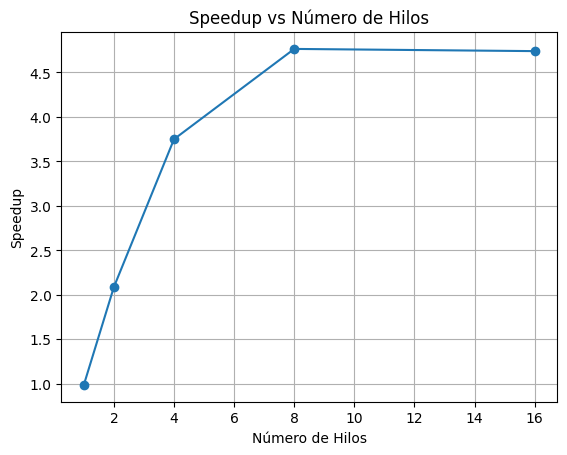

In [ ]:
#Gráfico Speedup vs número de hilos
plt.plot(df["N (Hilos)"], df["Speedup (Ts / Tp)"], marker='o')
plt.title("Speedup vs Número de Hilos")
plt.xlabel("Número de Hilos")
plt.ylabel("Speedup")
plt.grid(True)
plt.show()

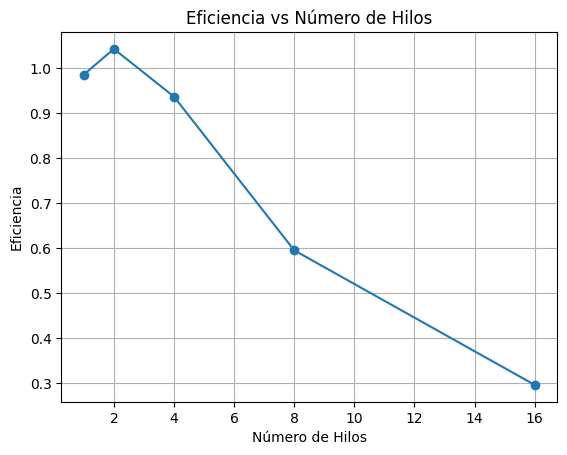

In [ ]:
#Gráfico de eficiencia vs número de hilos
plt.plot(df["N (Hilos)"], df["Eficiencia (Speedup / N)"], marker='o')
plt.title("Eficiencia vs Número de Hilos")
plt.xlabel("Número de Hilos")
plt.ylabel("Eficiencia")
plt.grid(True)
plt.show()

<h5>Análisis ejercicio pi:</h5>

Recordemos que para el desarrollo de este ejercicio se implementó una téncica llamada paralelismo por datos, donde, teníamos un número de datos que repartimos, o dividimos entre el número total de hilos de manera equitativa. De esta manera, cada hilo procdesa una parte del bucle y de los datos como tal, de manera que cada uno realice una suma parcial y al final los resultados de cada hilo sean sumados en una única variable.

Para la tabla se usaron desde 1 hilo hasta 2 x n (n = núcleos del pc desde el que se ejecutó = 8) hilos.

Para la ejecución actual se obtuvo un tiempo de 3.8271 s para el script serial, mientras que para el script paralelo se obtuvieron tiempos de 3.8794 para 1 hilo, 1.8338 s para 2 hilos, 1.0208 para 4 hilos, 0.8033 para 8 hilos y 0.8075 s para 16 hilos.

Comparando los tiempos del script serial y del script paralelo con 1 hilo podemos notar que, aunque normalmente el uso de la paralelización suele incrementar el rendimiento, no es este el caso para 1 solo hilo, esto se debe a que en ambos casos (ejecución serial y ejecución paralela con 1 hilo), los programas están realizando exactamente el mismo cálculo, sin embargo en el caso del scrip paralelo hay un overhead debido a que no se ejecuta la operación directamente, sino que se hacen procesos como pthread_create, cambio de contexto y pthread_join, que pueden suponer un costo adicional, en este caso de un 1,37 % aproximadamente.

Por el lado del speedup podemos notar que este puede aumentar significativamente cuando se comparan números de hilos pequeños, por ejemplo, el mayor aumento de speedup fue de 1 a 2 hilos, luego, vemos que el aumento va bajando poco a poco, e incluso, en comparación de 8 a 16 hilos, este speedup (aunque muy poco) se reduce, esto se debe a que el computador usado tiene solamente 8 núcleos, y cuando se ejecutan más de ese número, los hilos comienzan a pelear por CPU, se realizan más cambios de contexto y esto puede disminuir el rendimiento. Recordemos que el speedup es una medida en el aumento de rendimiento de un programa al ejecutarlo en paralelo, esta métrica responde a la pregunta -> ¿Qué tanto es más rápido el programa si uso N procesadores en lugar de uno?.

Por el lado de la eficiencia, recordemos que esta nos indica qué tanto se está aprovechando el procesador dependiendo del número de hilos que tengamos, en nuestro caso podemos notar que con 1, 2 y 4 hilos tenemos una eficiencia bastante alta, cercana al 100% (incluso con 2 hilos tiene más del 100), pero luego vemos que, de 8 en adelante la eficiencia baja bastante, lo que significa que la CPU se comienza a saturar debido a que el SO gasta tiempo dividiendo la CPU entre más hilos de los que puede ejecutar simultáneamente, sin embargo, la disminución de la eficiencia no afecta directamente la ejecución paralela, pues vemos que mientras más hilos usamos, más bajo era el tiempo de ejecución, al dividirse el cálculo entre múltiples hilos que se encargaban de hacer su propio cálculo al mismo tiempo.